## TOOLS

In [1]:
!pip install pandas
!pip install tensorflow
!pip install numpy
!pip install numpy
!pip install -U scikit-learn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import csv
import copy
import sklearn
import tensorflow as tf




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## DATA SET

In [2]:
concrete_data=pd.read_csv(r"C:\Users\satya\Downloads\Concrete_Data_Yeh - Concrete_Data_Yeh(in).csv")
concrete_data.shape


(1030, 9)

In [3]:
concrete_data.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [4]:
concrete_data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


array([[<Axes: title={'center': 'cement'}>,
        <Axes: title={'center': 'slag'}>,
        <Axes: title={'center': 'flyash'}>],
       [<Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'superplasticizer'}>,
        <Axes: title={'center': 'coarseaggregate'}>],
       [<Axes: title={'center': 'fineaggregate'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'csMPa'}>]], dtype=object)

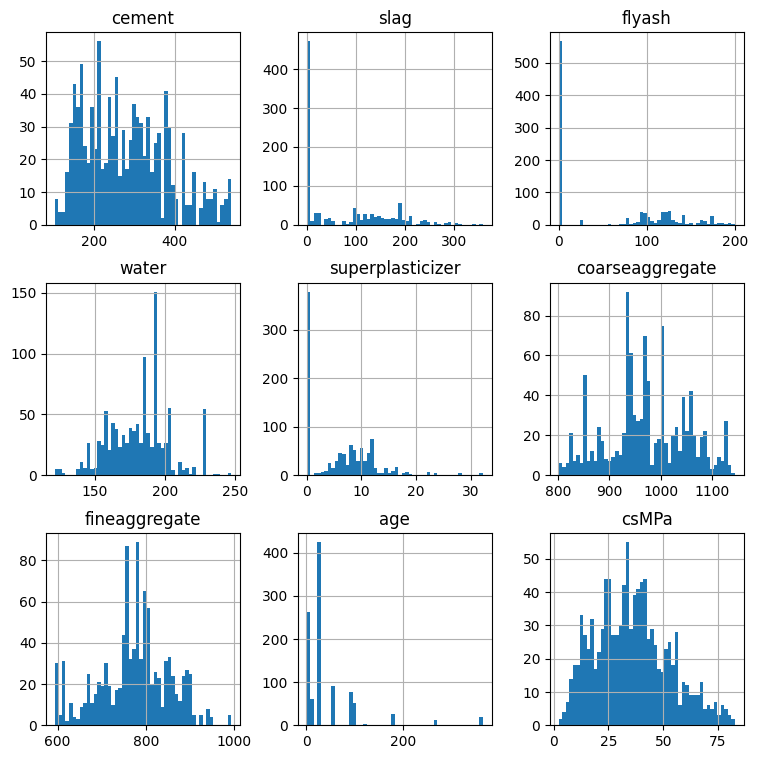

In [5]:
concrete_data.hist(bins=50,figsize=(9,9))

In [6]:
concrete_data.iloc[0]

cement               540.00
slag                   0.00
flyash                 0.00
water                162.00
superplasticizer       2.50
coarseaggregate     1040.00
fineaggregate        676.00
age                   28.00
csMPa                 79.99
Name: 0, dtype: float64

## FEATURE ENGINEERING

In [7]:
concrete_data['W/C']=concrete_data['water']/concrete_data['cement']

In [8]:
concrete_data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,W/C
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961,0.748266
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742,0.314005
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000,0.266893
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000,0.533333
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000,0.675349
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000,0.935165
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000,1.882353


## SPLIT TRAIN AND TEST DATA

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(concrete_data,test_size=0.3,random_state=40)
print(train_set.shape,test_set.shape)
print(train_set)

(721, 10) (309, 10)
      cement   slag  flyash  water  superplasticizer  coarseaggregate  \
967    154.8  183.4     0.0  193.3               9.1            877.2   
777    339.0    0.0     0.0  185.0               0.0           1069.0   
291    182.0   45.2   122.0  170.2               8.2           1059.4   
442    213.5    0.0   174.2  159.2              11.7           1043.6   
216    190.3    0.0   125.2  161.9               9.9           1088.1   
...      ...    ...     ...    ...               ...              ...   
626    236.0    0.0     0.0  193.0               0.0            968.0   
1016   164.2    0.0   200.1  181.2              12.6            849.3   
165    425.0  106.3     0.0  151.4              18.6            936.0   
7      380.0   95.0     0.0  228.0               0.0            932.0   
219    166.1    0.0   163.3  176.5               4.5           1058.6   

      fineaggregate  age  csMPa       W/C  
967           867.7   28  23.79  1.248708  
777           7

In [10]:
train_x,train_y=train_set.drop('csMPa',axis=1),train_set['csMPa']
test_x,test_y=test_set.drop('csMPa',axis=1),test_set['csMPa']
print(train_x,train_x.shape)

      cement   slag  flyash  water  superplasticizer  coarseaggregate  \
967    154.8  183.4     0.0  193.3               9.1            877.2   
777    339.0    0.0     0.0  185.0               0.0           1069.0   
291    182.0   45.2   122.0  170.2               8.2           1059.4   
442    213.5    0.0   174.2  159.2              11.7           1043.6   
216    190.3    0.0   125.2  161.9               9.9           1088.1   
...      ...    ...     ...    ...               ...              ...   
626    236.0    0.0     0.0  193.0               0.0            968.0   
1016   164.2    0.0   200.1  181.2              12.6            849.3   
165    425.0  106.3     0.0  151.4              18.6            936.0   
7      380.0   95.0     0.0  228.0               0.0            932.0   
219    166.1    0.0   163.3  176.5               4.5           1058.6   

      fineaggregate  age       W/C  
967           867.7   28  1.248708  
777           754.0   28  0.545723  
291         

## FEATURE SCALING

In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(train_x)
scalere = preprocessing.StandardScaler().fit(test_x)
Xt_scaled = scaler.transform(train_x)
Xte_scaled=scalere.transform(test_x)
train_y=np.array(train_y)

## MODEL DESIGN

## Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [13]:
model=LinearRegression()
model.fit(Xt_scaled,train_y)

LinearRegression()

In [14]:
test_predictions=model.predict(Xte_scaled)
train_predictions=model.predict(Xt_scaled)
print(train_predictions[10:15])

[52.73247723 17.96551051 41.17475905 43.04463895 25.28014181]


In [15]:
list(train_y[10:15])

[49.2, 30.96, 57.21, 55.02, 15.05]

In [16]:
x=[[413.64,10.89,10.89,191.5,0,1173.78,653.38,14,0.463],[370.1,43.54,21.77,191.5,0,1173.78,653.38,7,0.517]]
A=[[29.46],[21.56]]
x=np.array(x)
norm=preprocessing.StandardScaler().fit(x)
x=norm.transform(x)
model.predict(x)

array([40.04062651, 30.9952126 ])

In [17]:
print(model.coef_)

[10.17824508 10.33971031  6.23930773 -1.17043528  2.07634928  2.15091044
  2.20963997  7.44237172 -3.4811082 ]


In [18]:
print(model.intercept_)

35.51791955617198


## Evaluation

In [19]:
r2=r2_score(test_y,test_predictions)
print('R_Squared:',r2)

R_Squared: 0.5522222378739124


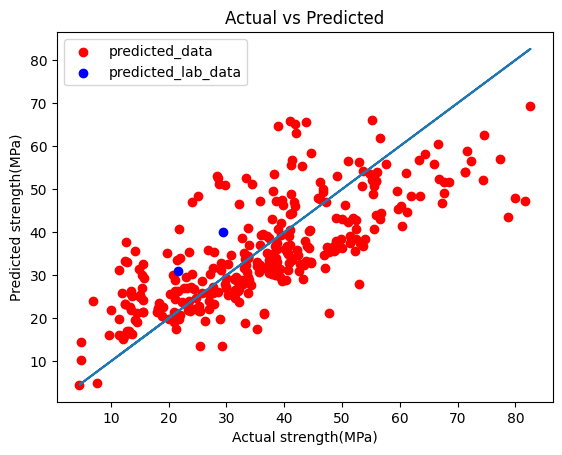

In [20]:
plt.plot(test_y,test_y)
plt.scatter(test_y,test_predictions,color='r',label='predicted_data')
plt.scatter(A,model.predict(x),color='blue',label='predicted_lab_data')
plt.title('Actual vs Predicted')
plt.xlabel('Actual strength(MPa)')
plt.ylabel('Predicted strength(MPa)')
plt.legend()
plt.show()

## DECISION TREE

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
model=DecisionTreeRegressor()
model.fit(Xt_scaled,train_y)

DecisionTreeRegressor()

In [23]:
tree_test_predictions=model.predict(Xte_scaled)
tree_train_predictions=model.predict(Xt_scaled)
x=[[413.64,10.89,10.89,191.5,0,1173.78,653.38,14,0.463],[370.1,43.54,21.77,191.5,0,1173.78,653.38,7,0.517]]
A=[[29.46],[21.56]]
x=np.array(x)
norm=preprocessing.StandardScaler().fit(x)
x=norm.transform(x)
model.predict(x)

array([61.92, 19.42])

## Evaluation

In [24]:
r2=r2_score(test_y,tree_test_predictions)
print('R_Squared:',r2)

R_Squared: 0.7271905487601876


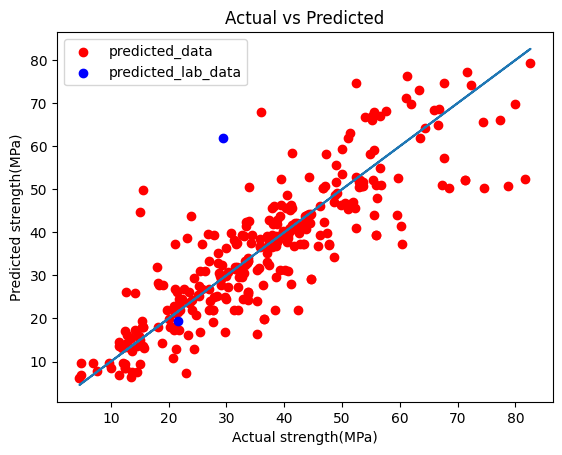

In [25]:
plt.plot(test_y,test_y)
plt.scatter(test_y,tree_test_predictions,color='r',label='predicted_data')
plt.scatter(A,model.predict(x),color='blue',label='predicted_lab_data')
plt.title('Actual vs Predicted')
plt.xlabel('Actual strength(MPa)')
plt.ylabel('Predicted strength(MPa)')
plt.legend()
plt.show()

## NEURAL NETWORK

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [27]:
model=Sequential([Dense(units=32,activation='relu',input_shape=(9,)),
                  Dense(units=64,activation='relu'),
                  Dense(units=16,activation='relu'),
                  Dense(units=1)])

C:\Users\satya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

In [29]:
model.fit(Xt_scaled,train_y,epochs=300)

Epoch 1/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 27.2873
Epoch 2/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 11.1476
Epoch 3/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 9.6623
Epoch 4/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 8.7493
Epoch 5/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 8.2969
Epoch 6/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 8.0170
Epoch 7/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 7.2806
Epoch 8/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 7.3555
Epoch 9/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 7.1634
Epoch 10/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8390 
Epoch 11/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 5.5985
Epoch 12/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 4.9965
Epoch 13/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 5.3324
Epoch 14/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 5.5622
Epoch 15/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7

In [30]:
predict_N=model.predict(Xte_scaled)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [31]:
r2=r2_score(test_y,predict_N)
print('R_Squared:',r2)

R_Squared: 0.8539974849598546


Text(0, 0.5, 'Predicted strength(MPa)')

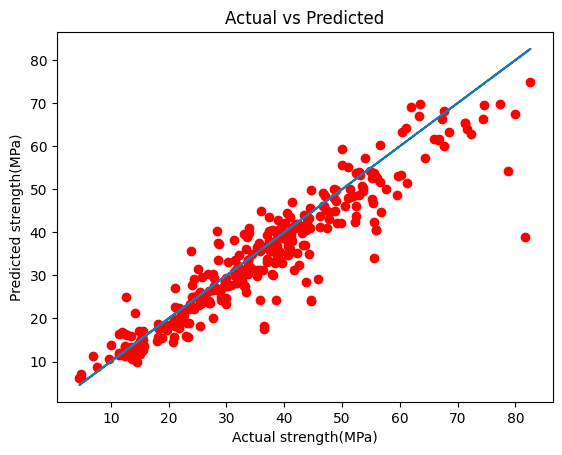

In [32]:
plt.plot(test_y,test_y)
plt.scatter(test_y,predict_N,color='r',label='predicted_data')
plt.title('Actual vs Predicted')
plt.xlabel('Actual strength(MPa)')
plt.ylabel('Predicted strength(MPa)')

## Lab data

In [33]:
x=[[413.64,10.89,10.89,191.5,0,1173.78,653.38,14,0.4629],[370.1,43.54,21.77,191.5,0,1173.78,653.38,7,0.517]]
A=[[29.46],[21.56]]
x=np.array(x)
norm=preprocessing.StandardScaler().fit(x)
x=norm.transform(x)

In [34]:
print(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[45.487766 ]
 [ 5.8640003]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Text(0, 0.5, 'Predicted strength(MPa)')

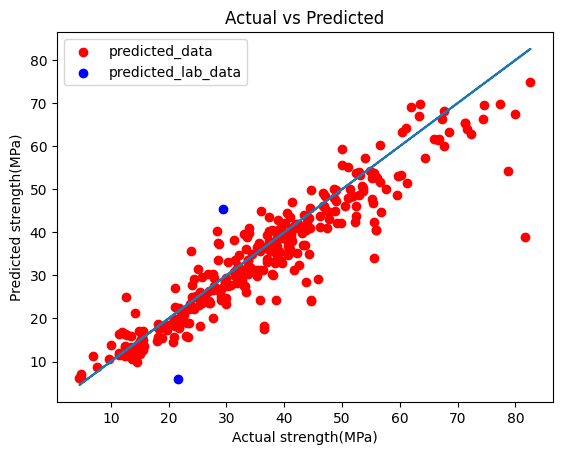

In [35]:
plt.plot(test_y,test_y)
plt.scatter(test_y,predict_N,color='r',label='predicted_data')
plt.scatter(A,model.predict(x),color='blue',label='predicted_lab_data')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Actual strength(MPa)')
plt.ylabel('Predicted strength(MPa)')